In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from quantum_logical.channel import AmplitudeDamping, PhaseDamping
from quantum_logical.trotter import TrotterGroup
from quantum_logical.interaction import ConversionGainInteraction
from tqdm import tqdm
from quantum_logical.creating_operators import Creating_operators
from quantum_logical.operators import selective_destroy
from scipy.optimize import curve_fit

In [2]:
# generating parameters and creating initial state
T1 = 40
T2 = 8
N = 2
dim = 3
trotter_dt = .02
psi0 = qt.tensor(qt.basis(dim, 1), qt.basis(dim, 0))
rho0 = psi0 * psi0.dag()
amp_damp_channel = AmplitudeDamping(T1, num_qubits=N, hilbert_space_dim=dim)
phase_damp_channel = PhaseDamping(T1, T2, num_qubits=N, hilbert_space_dim=dim)
trotter = TrotterGroup(
    continuous_operators=[amp_damp_channel, phase_damp_channel],
    trotter_dt=trotter_dt,
)


qt.Qobj(amp_damp_channel._create_single_qubit_operators(T1=1)[1])
rho0

Quantum object: dims=[[3, 3], [3, 3]], shape=(9, 9), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [3]:
dur = 1000
rho_delay = trotter.apply(state=rho0, duration=dur, discrete_unitary=qt.qeye(dim ** N))
rho_delay[-1]

Quantum object: dims=[[3, 3], [3, 3]], shape=(9, 9), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99996268e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.73248062e-06
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+0

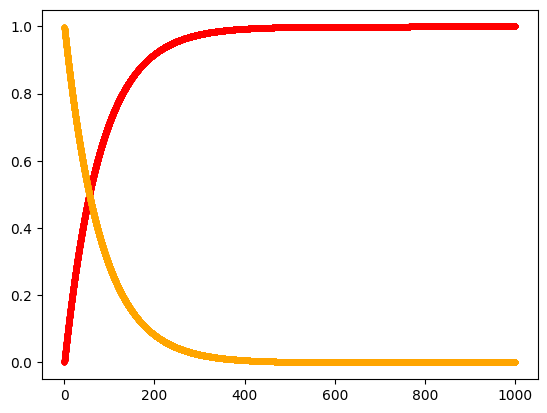

In [21]:
# data gathering for plot generation
gg = []
eg = []
values = []
for i in rho_delay:
    gg.append(i[0, 0])
    eg.append(i[3, 3])

time = np.linspace(0, dur, len(rho_delay))

fig, ax = plt.subplots()
ax.plot(time, gg, marker = '.', color = "r")
ax.plot(time, eg, marker = '.', color = "orange")

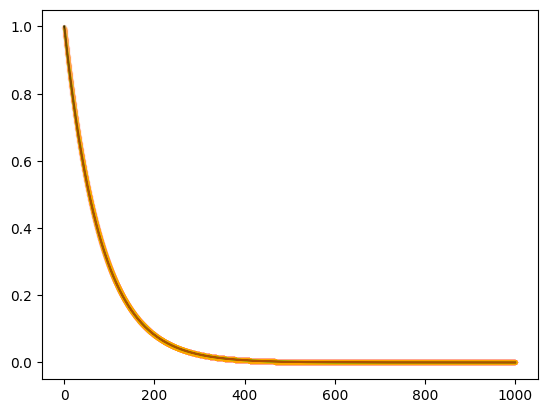

In [23]:
# decay from eg to gg best fit
def function_fit(t, b):
    return np.exp(-t / b)

parameters, covariance = curve_fit(function_fit, time, eg)

# plotting best fit line and superimpose it on eg as a function of time 
fit_func = function_fit(time, parameters[0])
plt.plot(time, fit_func, color = "black", linestyle = "-")
plt.plot(time, eg, color = "orange", marker = ".", alpha = 0.01)
